# CGV 한국 실적 예측하기

## 데이터 만들기

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CGV IR 자료

In [55]:
data = [
    [1950, 127, 439, 120, 907, 2675, 1212, 11324],
    [2360, 198, 520, 119, 901, 4109, 1825, 10821],
    [1910, 8, 326, 121, 918, 3314, 1108 , 10894],
    [846, -456, -139, 121, 913, 1179, 431, 10242],
    [1129, -273, 31, 121, 913, 2021, 962, 10132], 
    [893, -430, -125, 119, 908, 2030, 901, 9731],
    [741, -405, -89, 120, 914, 1187, 424, 9637],
    [523 , -527, -198, 119, 908, 815, 379, 9212],
    [632, -570, -191, 119, 908, 967, 375, 8284],
    [987, -433, -10, 119, 909, 1744, 704, 8347],
    [360, -701, -338, 115, 885, 636, 254, 7782],
    [1278, -330, 25, 115, 885, 2602, 1006, 8116],
    [2566, 254, 622, 115, 885, 5591, 2099, 8225],
    [2821, 265, 699, 112, 866, 6147, 2317, 8262],
    [2636, 140, 610, 111, 863, 5425, 2090, 8492],
    [2441, 93, 484, 110, 854, 5507, 2103, 8303]

]

# 칼럼명
cgv_kr = pd.DataFrame(data, columns = ["rv", "op", "ebitda", "site", "screen", "kr_bo", "cgv_bo", "atp"])

# 분기 이름 인덱스 붙이기
idx = [f"{i}_{j}Q" for i in range(22,18, -1) for j in range(4,0, -1) ]
cgv_kr.index = idx

In [56]:
# 날짜 데이터로 변환하기
from datetime import datetime

def convert_quarter_to_date(quarter_str):
    year = int(quarter_str[:2]) + 2000
    quarter = int(quarter_str[3])
    month = quarter * 3
    date_str = f"{year}-{month}-30"
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date

cgv_kr["date"] = [convert_quarter_to_date(i) for i in cgv_kr.index]

In [57]:
cgv_kr["year"] = pd.DatetimeIndex(cgv_kr["date"]).year

In [91]:
cgv_kr = cgv_kr.sort_values(by = "date")

In [92]:
cgv_kr_year = cgv_kr.groupby("year").agg({'site':'mean', 'screen':'mean',
                                 'rv':'sum', 'op':'sum', 'ebitda':'sum', 
                                 'kr_bo':'sum', 'cgv_bo':'sum', 
                                 'atp':'mean',})

In [109]:
type(cgv_kr_year.index.tolist())

list

### CGV 대한민국 atp 변화

In [69]:
import matplotlib as matplot
matplot.rcParams['font.family'] = 'Malgun Gothic'
matplot.rcParams['axes.unicode_minus'] = False


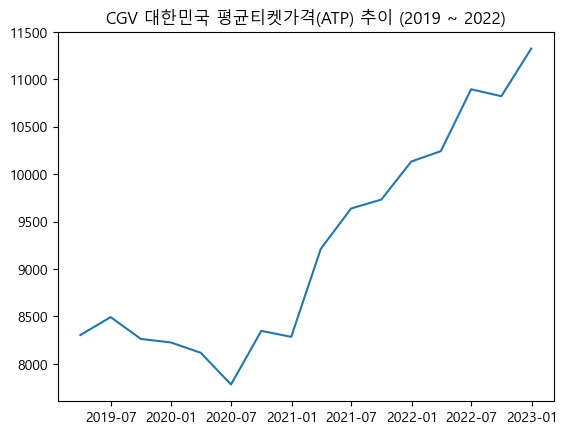

In [73]:
plt.
plt.title("CGV 대한민국 평균티켓가격(ATP) 추이 (2019 ~ 2022)")
plt.plot(cgv_kr["date"], cgv_kr["atp"])


CGV 매출 영업이익 추이

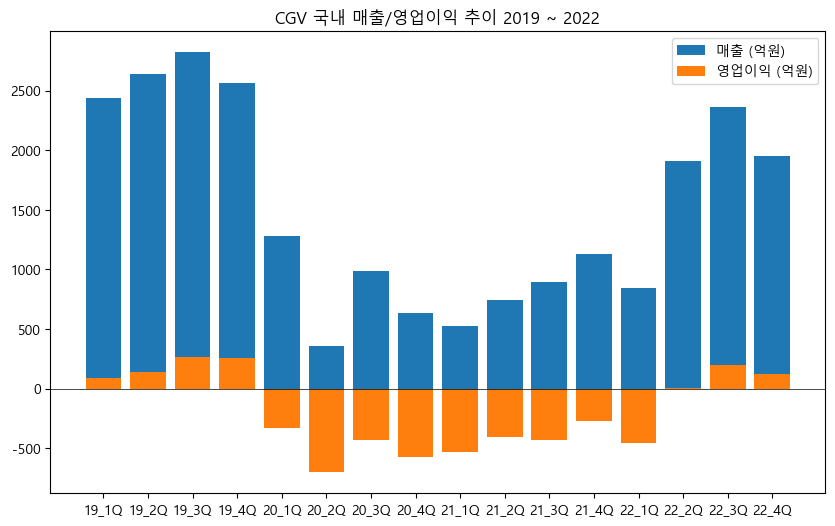

In [152]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
ax1.bar(cgv_kr.index, cgv_kr["rv"], label = "매출 (억원)")
ax2 = ax1
ax2.bar(cgv_kr.index, cgv_kr["op"], label = "영업이익 (억원)")
ax2.set_title("CGV 국내 매출/영업이익 추이 2019 ~ 2022")
plt.axhline(0, color = 'black', linewidth = 0.5)
plt.legend()
plt.show()

In [111]:
type(cgv_kr_year.index.tolist()[0])

int

In [122]:
cgv_kr_year["year"] = ["2019", "2020", "2021", "2022"]

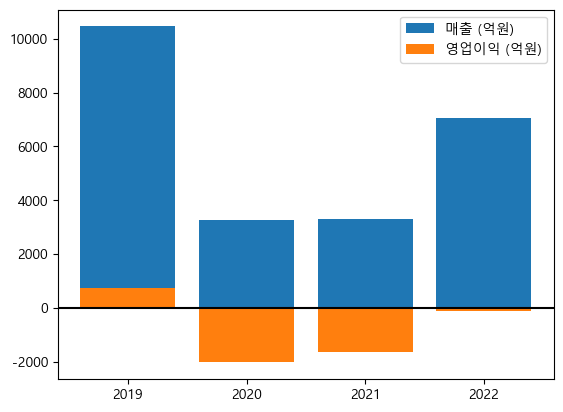

In [153]:
fig, ax1 = plt.subplots()
ax1.bar(cgv_kr_year["year"], cgv_kr_year["rv"], label = "매출 (억원)")

ax2 = ax1
ax2.bar(cgv_kr_year["year"], cgv_kr_year["op"], label = "영업이익 (억원)")
ax2.axhline(0, color = 'black')
plt.legend()

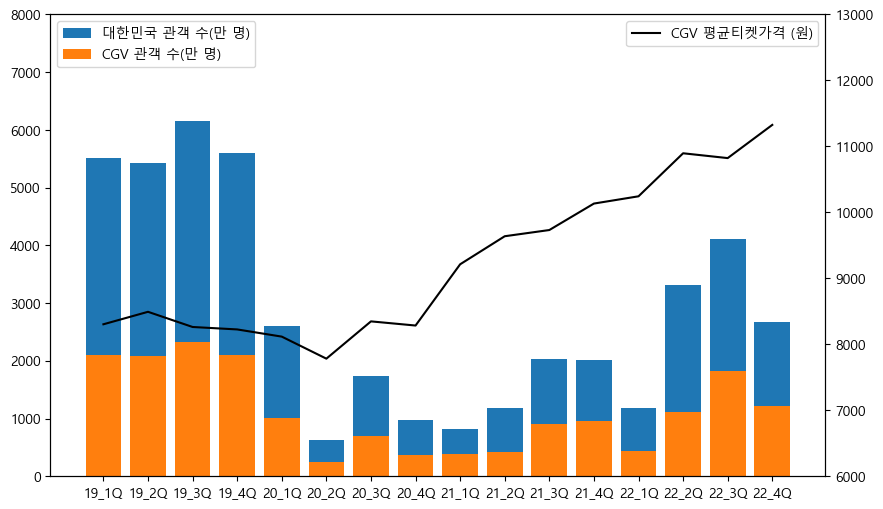

In [160]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10 ,6)
ax1.bar(cgv_kr.index, cgv_kr["kr_bo"], label = "대한민국 관객 수(만 명)")
ax1.set_ylim([0, 8000])
ax1.bar(cgv_kr.index, cgv_kr["cgv_bo"], label = "CGV 관객 수(만 명)") 

ax2= ax1.twinx()
ax2.plot(cgv_kr.index, cgv_kr["atp"], color = 'black', label = "CGV 평균티켓가격 (원)")
ax2.set_ylim([6000, 13000])
fig.set_size_inches(10 ,6)
ax1.legend(loc= 'upper left')
ax2.legend()
plt.show()

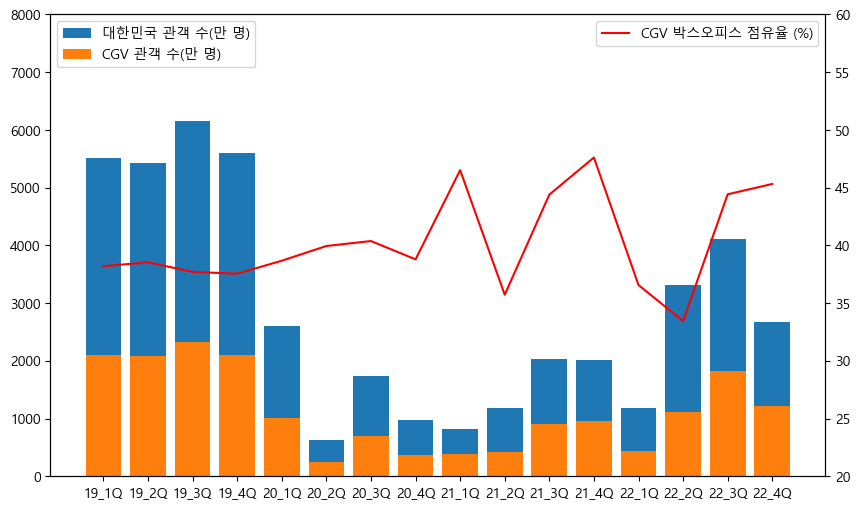

In [159]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10 ,6)
ax1.bar(cgv_kr.index, cgv_kr["kr_bo"], label = "대한민국 관객 수(만 명)")
ax1.set_ylim([0, 8000])
ax1.bar(cgv_kr.index, cgv_kr["cgv_bo"], label = "CGV 관객 수(만 명)") 

ax2= ax1.twinx()
ax2.plot(cgv_kr.index, cgv_kr["cgv_bo"]/cgv_kr["kr_bo"]*100, color = 'red', label = "CGV 박스오피스 점유율 (%)")
fig.set_size_inches(10 ,6)
ax2.set_ylim([20, 60])
ax1.legend(loc= 'upper left')
ax2.legend()
plt.show()

In [163]:
data =[
    [33065, 31512],
    [40960, 38862],
    [26577, 22593]

]
imax = pd.DataFrame(data)
imax.columns= ["all", "2d"]
imax.index = ["22_2Q", "22_3Q", "22_4Q"]
imax["special"] = imax['all'] -imax["2d"]
print(imax)

         all     2d  special
22_2Q  33065  31512     1553
22_3Q  40960  38862     2098
22_4Q  26577  22593     3984


(0.0, 20.0)

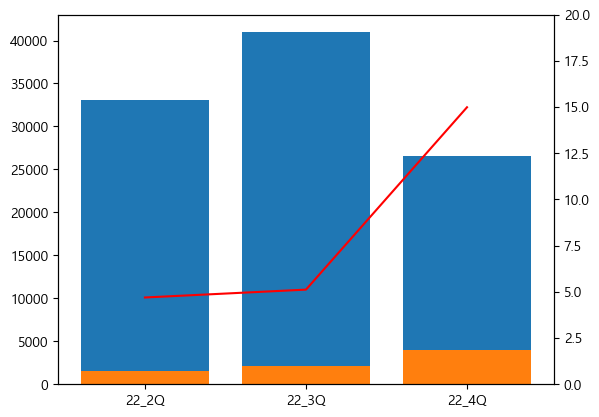

In [173]:
fig, ax1 = plt.subplots()
ax1.bar(imax.index, imax["all"], label = '전책 관객 수')
ax1.bar(imax.index, imax["special"], label = "특별관 관객 수")
ax2 = ax1.twinx()
ax2.plot(imax.index, imax["special"]/imax["all"]*100, color = 'red', label = "특별관(3D, SCREENX, 4D 등) 점유율")
ax2.set_ylim([0, 20])

### 실적 예측하기

In [239]:
data = pd.read_csv("C:/Users/HwijunKwon/Desktop/project/investing_python/CGV/boxoffice_monthly.csv", header = 1,
                     encoding = "cp949")[:-1]
data_2023= pd.read_csv("C:/Users/HwijunKwon/Desktop/project/investing_python/CGV/boxoffice_monthly_2023.csv", header = 1, encoding = 'cp949')


In [241]:
data = pd.concat([data, data_2023], axis = 0)

In [242]:
data = data[:-1]
data.index = data["Unnamed: 0"]

In [245]:
data["year"] = [int(i[:4]) for i in data["Unnamed: 0"]]
data["month"] = [int(i[-2:]) for i in data["Unnamed: 0"]]

In [246]:
data

,Unnamed: 0,개봉편수,상영편수,매출액,관객수,점유율,개봉편수.1,상영편수.1,매출액.1,관객수.1,점유율.1,개봉편수.2,상영편수.2,매출액.2,관객수.2,month,year
Unnamed: 0,,,,,,,,,,,,,,,,,
2022-01,2022-01,65,144,"22,038,947,010","2,274,717",39.8%,89,225,"33,562,548,910","3,443,325",60.2%,154,369,"55,601,495,920","5,718,042",1,2022
2022-02,2022-02,47,110,"12,744,376,230","1,377,463",42.1%,70,220,"18,203,974,930","1,894,960",57.9%,117,330,"30,948,351,160","3,272,423",2,2022
2022-03,2022-03,57,131,"7,867,397,260","846,247",30.2%,105,244,"19,145,934,426","1,953,443",69.8%,162,375,"27,013,331,686","2,799,690",3,2022
2022-04,2022-04,79,165,"8,377,298,710","876,930",28.1%,78,245,"22,043,579,850","2,243,214",71.9%,157,410,"30,420,878,560","3,120,144",4,2022
2022-05,2022-05,76,176,"79,339,521,110","7,735,086",53.1%,99,242,"71,416,348,050","6,825,573",46.9%,175,418,"150,755,869,160","14,560,659",5,2022
2022-06,2022-06,87,199,"95,224,113,280","9,349,642",60.4%,90,261,"62,945,298,030","6,125,870",39.6%,177,460,"158,169,411,310","15,475,512",6,2022
2022-07,2022-07,68,168,"65,977,706,376","6,357,425",39.0%,72,238,"104,473,573,011","9,933,818",61.0%,140,406,"170,451,279,387","16,291,243",7,2022
2022-08,2022-08,60,164,"123,376,977,426","12,143,049",81.2%,80,222,"28,924,760,359","2,813,785",18.8%,140,386,"152,301,737,785","14,956,834",8,2022
2022-09,2022-09,68,195,"91,709,095,309","8,987,768",91.1%,68,245,"10,168,567,899","872,798",8.9%,136,440,"101,877,663,208","9,860,566",9,2022


In [249]:
def delcomma(list) :
    result = [int(i.replace(",", "")) for i in list]
    return result

data["총 관객수"] = delcomma(data["관객수.2"])
data["총 매출"] = delcomma(data["매출액.2"])

In [250]:
quater = [(i-1)//3 +1 for i in data["month"]]
data["quater"] = quater

In [251]:
data[["year", "quater", "총 관객수", "총 매출"]]

,year,quater,총 관객수,총 매출
Unnamed: 0,,,,
2022-01,2022,1,5718042,55601495920
2022-02,2022,1,3272423,30948351160
2022-03,2022,1,2799690,27013331686
2022-04,2022,2,3120144,30420878560
2022-05,2022,2,14560659,150755869160
2022-06,2022,2,15475512,158169411310
2022-07,2022,3,16291243,170451279387
2022-08,2022,3,14956834,152301737785
2022-09,2022,3,9860566,101877663208


In [264]:
data_new = data[["year", "quater", "총 관객수", "총 매출"]].groupby(["year", "quater"]).sum()

In [266]:
cgv_2022 = cgv_kr[cgv_kr["date"].dt.year.isin([2022])]

In [273]:
cgv_2022

,rv,op,ebitda,site,screen,kr_bo,cgv_bo,atp,date,year
22_1Q,846,-456,-139,121,913,1179,431,10242,2022-03-30,2022
22_2Q,1910,8,326,121,918,3314,1108,10894,2022-06-30,2022
22_3Q,2360,198,520,119,901,4109,1825,10821,2022-09-30,2022
22_4Q,1950,127,439,120,907,2675,1212,11324,2022-12-30,2022


Index(['22_1Q', '22_2Q', '22_3Q', '22_4Q'], dtype='object')

In [277]:
data_2022 =data_new[:-1]
data_2022.index = cgv_2022.index

In [281]:
agg_data = pd.concat([data_2022, cgv_2022], axis =1)

In [287]:
agg_data[1:]

,총 관객수,총 매출,rv,op,ebitda,site,screen,kr_bo,cgv_bo,atp,date,year
22_2Q,33156315,339346159030,1910,8,326,121,918,3314,1108,10894,2022-06-30,2022
22_3Q,41108643,424630680380,2360,198,520,119,901,4109,1825,10821,2022-09-30,2022
22_4Q,26749981,282673466224,1950,127,439,120,907,2675,1212,11324,2022-12-30,2022


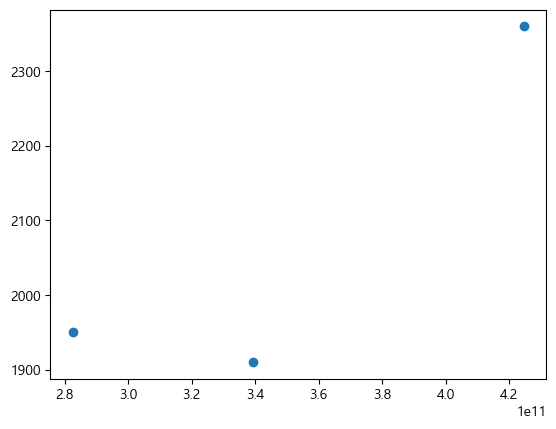

In [286]:
plt.scatter(agg_data["총 매출"][1:], agg_data["rv"][1:])

In [293]:
agg_after_2q = agg_data[1:]
agg_after_2q = pd.concat([agg_after_2q, imax], axis =1 )

In [295]:
agg_after_2q

,총 관객수,총 매출,rv,op,ebitda,site,screen,kr_bo,cgv_bo,atp,date,year,all,2d,special
22_2Q,33156315,339346159030,1910,8,326,121,918,3314,1108,10894,2022-06-30,2022,33065,31512,1553
22_3Q,41108643,424630680380,2360,198,520,119,901,4109,1825,10821,2022-09-30,2022,40960,38862,2098
22_4Q,26749981,282673466224,1950,127,439,120,907,2675,1212,11324,2022-12-30,2022,26577,22593,3984


In [305]:
agg_after_2q["cgv_bo"]/ (agg_after_2q["총 관객수"]/10000000000)
agg_after_2q["cgv_bo"]/ (agg_after_2q["총 매출"]/10000000000)

22_2Q    32.651025
22_3Q    42.978524
22_4Q    42.876327
dtype: float64

In [307]:
agg_after_2q["rv"]/(agg_after_2q["총 매출"]/10000000000)

22_2Q    56.284710
22_3Q    55.577708
22_4Q    68.984190
dtype: float64

In [318]:
range(1,4)

range(1, 4)

In [321]:
np.arange(1,4)

array([1, 2, 3])

In [417]:
idx

array([1, 2, 3])

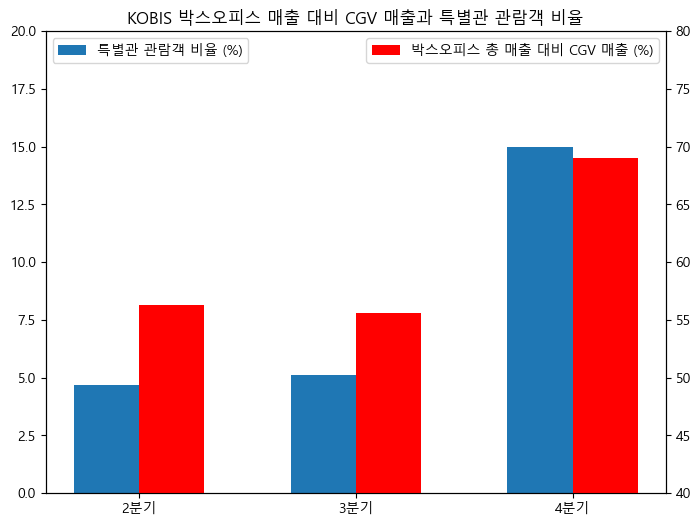

In [424]:
fig, ax1 = plt.subplots()
w = 0.3
idx = np.arange(0,3)
ax1.bar(idx-w*0.5, agg_after_2q["special"]*100/agg_after_2q["all"], width = w, label ="특별관 관람객 비율 (%)")
ax1.set_ylim([0, 20])
ax2 = ax1.twinx()
ax2.bar(idx+w*0.5, agg_after_2q["rv"]/(agg_after_2q["총 매출"]/10000000000), width = w, color = "red", label ="박스오피스 총 매출 대비 CGV 매출 (%)")
ax2.set_ylim([40, 80])
ax1.legend(loc = "upper left")
ax1.set_title("KOBIS 박스오피스 매출 대비 CGV 매출과 특별관 관람객 비율")
ax2.legend()
plt.xticks([0, 1, 2], ["2분기", "3분기", "4분기"])

fig.set_size_inches(8, 6)

In [310]:
agg_after_2q["special"]/agg_after_2q["all"]*100

22_2Q     4.696809
22_3Q     5.122070
22_4Q    14.990405
dtype: float64

agg_after_2q

### 회귀분석

In [358]:
특별관_매출액 = pd.DataFrame({
    "22_2Q" : [338112, 315210],
    "22_3Q" : [422690, 392867],
    "22_4Q" : [279402, 219825],
    "23_1Q" : [269432, 216665]
})

In [361]:
special = 특별관_매출액.T
special.columns =["all", "2d"]
special["spec"] = special["all"]-special["2d"] 

In [379]:
special["spec"]*100/special["all"]

22_2Q     6.773495
22_3Q     7.055525
22_4Q    21.323040
23_1Q    19.584533
dtype: float64

In [371]:
agg_after_2q["special_prop"] = special["spec"]*100/special["all"]

In [375]:
input = agg_after_2q[["rv", "총 매출", "special_prop"]]

In [387]:
input["총 매출"] = special["all"][:-1]

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_6756\1545596440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input["총 매출"] = special["all"][:-1]


In [388]:
input

,rv,총 매출,special_prop,총매출
22_2Q,1910,338112,6.773495,338112
22_3Q,2360,422690,7.055525,422690
22_4Q,1950,279402,21.323040,279402


In [374]:
special["spec"]/special["all"]

22_2Q    0.067735
22_3Q    0.070555
22_4Q    0.213230
23_1Q    0.195845
dtype: float64

In [ ]:
rv

In [390]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
model = LinearRegression()
X = input[["총 매출", "special_prop"]]
y = input["rv"]
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)


In [397]:
input

,rv,총 매출,special_prop,총매출
22_2Q,1910,338112,6.773495,338112
22_3Q,2360,422690,7.055525,422690
22_4Q,1950,279402,21.323040,279402


In [392]:
X

,총 매출,special_prop
22_2Q,338112,6.773495
22_3Q,422690,7.055525
22_4Q,279402,21.323040


In [351]:
print(model.intercept_, model.coef_)

23.1361438791223 [5.11661201e-09 3.20560650e+03]


In [398]:
new_X = [[269432, 19.58]]

y_pred = model.predict(new_X)
print(y_pred)

[1856.09537662]


c:\Users\HwijunKwon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [437]:
special["spec"]*100/special["all"]

22_2Q     6.773495
22_3Q     7.055525
22_4Q    21.323040
23_1Q    19.584533
dtype: float64

In [452]:
new = input["rv"].tolist()



None


In [460]:
special["all"]

22_2Q    338112
22_3Q    422690
22_4Q    279402
23_1Q    269432
Name: all, dtype: int64

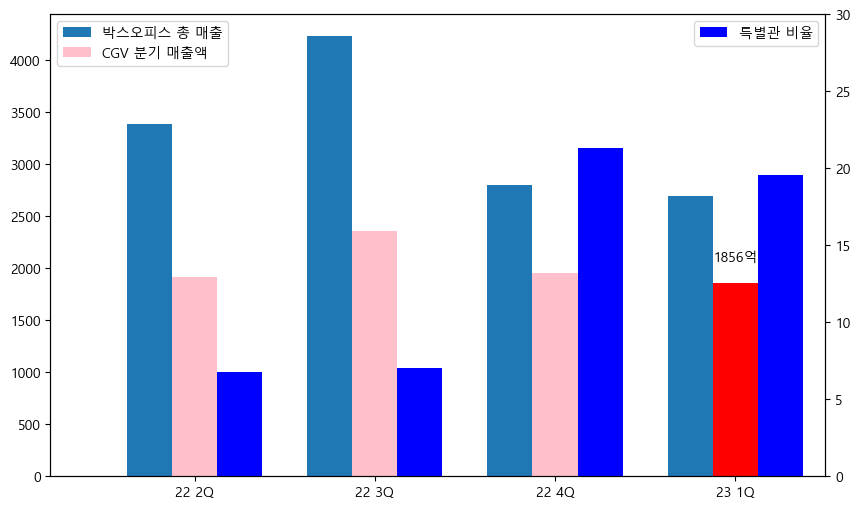

In [495]:
fig, ax1 = plt.subplots()
idx = np.arange(0, 4)
w = 0.5
ax1.bar(idx-w*0.5, special["all"]/100, width = w/2, label = "박스오피스 총 매출")
ax1.bar(np.arange(0, 3),input["rv"], width =w/2 , color = '#FFC0CB', label = 'CGV 분기 매출액')
ax2 = ax1.twinx()
ax2.bar(idx+w*0.5, special["spec"]*100/special["all"], width = w/2, color = "blue", label = "특별관 비율")
ax2.set_ylim([0, 30])
ax2.set_xticks([0, 1, 2, 3], ["22 2Q", "22 3Q", "22 4Q", "23 1Q"])
ax1.legend(loc = 'upper left')
ax2.legend()
ax2.set_xlim([-0.8, 3.5])
fig.set_size_inches([10, 6])
ax2.text(2.88, 14, "1856억", fontsize = 10)
ax1.bar(3, 1856, color = 'red', width= w/2)
plt.show()